In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')

# Load the dataset
data = pd.read_csv("human.csv")

#unique activity
data.Activity.unique()

data["label"]=data.Activity.map({"STANDING":"STANDING","SITTING":"SITTING","LAYING":"LAYING","WALKING":"WALKING",'WALKING_DOWNSTAIRS':"WALKING",'WALKING_UPSTAIRS':"WALKING"})

data.label.unique()

del data['Activity']

from sklearn.preprocessing import LabelEncoder
var_mod = ['label']
le = LabelEncoder()
for i in var_mod:
    data[i] = le.fit_transform(data[i]).astype(int)
    
# Split the data into features and target
X = data.drop(labels=['label','subject'], axis=1)
y = data.loc[:,'label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1,stratify=y)
# Initialize the different algorithms
log_reg = LogisticRegression()
decision_tree = DecisionTreeClassifier()
knn = KNeighborsClassifier()
svm = SVC()
random_forest = RandomForestClassifier()

# Train the algorithms on the training data
log_reg.fit(X_train, y_train)
decision_tree.fit(X_train, y_train)
knn.fit(X_train, y_train)
svm.fit(X_train, y_train)
random_forest.fit(X_train, y_train)

# Make predictions on the test data
log_reg_predictions = log_reg.predict(X_test)
decision_tree_predictions = decision_tree.predict(X_test)
knn_predictions = knn.predict(X_test)
svm_predictions = svm.predict(X_test)
random_forest_predictions = random_forest.predict(X_test)

# Print the accuracy of the predictions
print("Logistic Regression Accuracy: ", accuracy_score(y_test, log_reg_predictions))
print("Decision Tree Accuracy: ", accuracy_score(y_test, decision_tree_predictions))
print("KNN Accuracy: ", accuracy_score(y_test, knn_predictions))
print("SVM Accuracy: ", accuracy_score(y_test, svm_predictions))
print("Random Forest Accuracy: ", accuracy_score(y_test, random_forest_predictions))

# Print the confusion matrix for each algorithm
print("\n Logistic Regression Confusion Matrix: \n\n", confusion_matrix(y_test, log_reg_predictions))
print("\n Decision Tree Confusion Matrix: \n\n", confusion_matrix(y_test, decision_tree_predictions))
print("\n KNN Confusion Matrix: \n\n", confusion_matrix(y_test, knn_predictions))
print("\n SVM Confusion Matrix: \n\n", confusion_matrix(y_test, svm_predictions))
print("\n Random Forest Confusion Matrix: \n\n", confusion_matrix(y_test, random_forest_predictions))

# #This code first imports necessary libraries, loads the dataset, and splits the data into features and target. Then, it splits the data into the performance of 
# the different algorithms. Next, it initializes each algorithm and trains them on the training data. It then uses each algorithm to make predictions on the test 
# data, and calculates the accuracy of each algorithm using the accuracy_score function. It also prints the confusion matrix for each algorithm to give a more 
# detailed understanding of the performance.

Logistic Regression Accuracy:  0.984180790960452
Decision Tree Accuracy:  0.9627118644067797
KNN Accuracy:  0.9706214689265537
SVM Accuracy:  0.9717514124293786
Random Forest Accuracy:  0.9875706214689266

 Logistic Regression Confusion Matrix: 

 [[161   0   0   0]
 [  0 141   6   0]
 [  0   8 152   0]
 [  0   0   0 417]]

 Decision Tree Confusion Matrix: 

 [[161   0   0   0]
 [  0 129  18   0]
 [  0  15 145   0]
 [  0   0   0 417]]

 KNN Confusion Matrix: 

 [[161   0   0   0]
 [  1 133  13   0]
 [  0  12 148   0]
 [  0   0   0 417]]

 SVM Confusion Matrix: 

 [[161   0   0   0]
 [  0 133  14   0]
 [  0  11 149   0]
 [  0   0   0 417]]

 Random Forest Confusion Matrix: 

 [[161   0   0   0]
 [  0 141   6   0]
 [  0   5 155   0]
 [  0   0   0 417]]


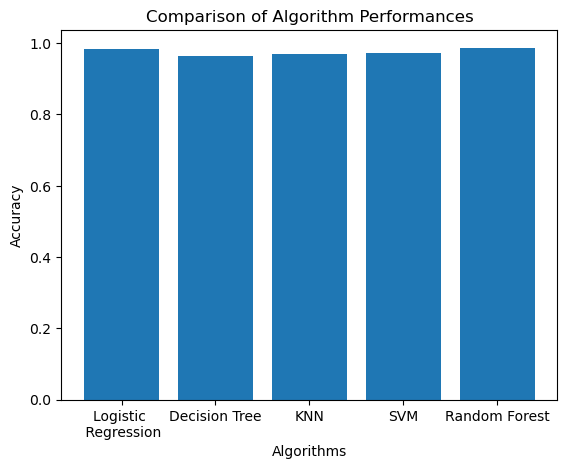

In [2]:
# Import library for data visualization
import matplotlib.pyplot as plt

# Create a list of the algorithms and their corresponding accuracy scores
algorithms = ["Logistic \n Regression", "Decision Tree", "KNN", "SVM", "Random Forest"]
scores = [accuracy_score(y_test, log_reg_predictions), accuracy_score(y_test, decision_tree_predictions),
          accuracy_score(y_test, knn_predictions), accuracy_score(y_test, svm_predictions),
          accuracy_score(y_test, random_forest_predictions)]

# Create a bar plot to compare the performance of the different algorithms
plt.bar(algorithms, scores)
plt.xlabel("Algorithms")
plt.ylabel("Accuracy")
plt.title("Comparison of Algorithm Performances")
plt.show()


In [3]:
#This code calculates the precision, recall, and F1 score for each algorithm using the precision_score, recall_score, and f1_score functions from the sklearn.metrics 
# library. It also prints the values for each algorithm, allowing you to compare the performance of the different algorithms using these additional metrics.

from sklearn.metrics import precision_score, recall_score, f1_score

# Calculate precision, recall, and F1 score for each algorithm
log_reg_precision = precision_score(y_test, log_reg_predictions, average='weighted')
decision_tree_precision = precision_score(y_test, decision_tree_predictions, average='weighted')
knn_precision = precision_score(y_test, knn_predictions, average='weighted')
svm_precision = precision_score(y_test, svm_predictions, average='weighted')
random_forest_precision = precision_score(y_test, random_forest_predictions, average='weighted')

log_reg_recall = recall_score(y_test, log_reg_predictions, average='weighted')
decision_tree_recall = recall_score(y_test, decision_tree_predictions, average='weighted')
knn_recall = recall_score(y_test, knn_predictions, average='weighted')
svm_recall = recall_score(y_test, svm_predictions, average='weighted')
random_forest_recall = recall_score(y_test, random_forest_predictions, average='weighted')

log_reg_f1 = f1_score(y_test, log_reg_predictions, average='weighted')
decision_tree_f1 = f1_score(y_test, decision_tree_predictions, average='weighted')
knn_f1 = f1_score(y_test, knn_predictions, average='weighted')
svm_f1 = f1_score(y_test, svm_predictions, average='weighted')
random_forest_f1 = f1_score(y_test, random_forest_predictions, average='weighted')

# Print the precision, recall, and F1 score for each algorithm
print("Logistic Regression Precision: ", log_reg_precision)
print("Decision Tree Precision: ", decision_tree_precision)
print("KNN Precision: ", knn_precision)
print("SVM Precision: ", svm_precision)
print("Random Forest Precision: ", random_forest_precision)

print("\nLogistic RegressionRecall: ", log_reg_recall)
print("Decision Tree Recall: ", decision_tree_recall)
print("KNN Recall: ", knn_recall)
print("SVM Recall: ", svm_recall)
print("Random Forest Recall: ", random_forest_recall)

print("\nLogistic Regression F1 Score: ", log_reg_f1)
print("Decision Tree F1 Score: ", decision_tree_f1)
print("KNN F1 Score: ", knn_f1)
print("SVM F1 Score: ", svm_f1)
print("Random Forest F1 Score: ", random_forest_f1)

Logistic Regression Precision:  0.9842163086816349
Decision Tree Precision:  0.9627330941735122
KNN Precision:  0.9705326564290867
SVM Precision:  0.9717836181299321
Random Forest Precision:  0.9875740344693819

Logistic RegressionRecall:  0.984180790960452
Decision Tree Recall:  0.9627118644067797
KNN Recall:  0.9706214689265537
SVM Recall:  0.9717514124293786
Random Forest Recall:  0.9875706214689266

Logistic Regression F1 Score:  0.9841844882938583
Decision Tree F1 Score:  0.9626928222386557
KNN F1 Score:  0.9705666075725362
SVM F1 Score:  0.9717369865444362
Random Forest F1 Score:  0.9875687713280545


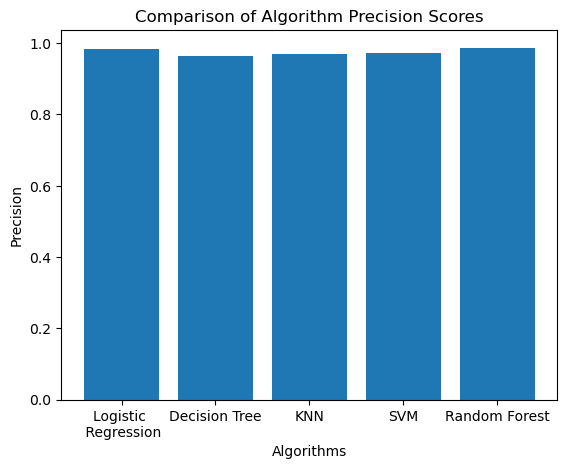

In [4]:
# Create a list of the precision scores for each algorithm
precision_scores = [log_reg_precision, decision_tree_precision, knn_precision, svm_precision, random_forest_precision]

# Create a bar plot to compare the precision scores of the different algorithms
plt.bar(algorithms, precision_scores)
plt.xlabel("Algorithms")
plt.ylabel("Precision")
plt.title("Comparison of Algorithm Precision Scores")
plt.show()

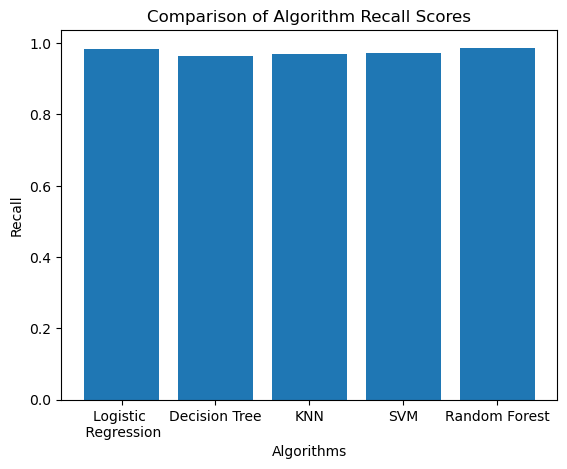

In [5]:
# Create a list of the recall scores for each algorithm
recall_scores = [log_reg_recall, decision_tree_recall, knn_recall, svm_recall, random_forest_recall]

# Create a bar plot to compare the recall scores of the different algorithms
plt.bar(algorithms, recall_scores)
plt.xlabel("Algorithms")
plt.ylabel("Recall")
plt.title("Comparison of Algorithm Recall Scores")
plt.show()

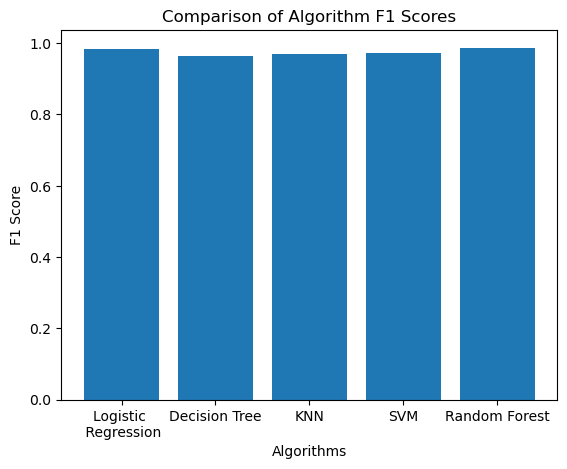

In [6]:
# Create a list of the F1 scores for each algorithm
f1_scores = [log_reg_f1, decision_tree_f1, knn_f1, svm_f1, random_forest_f1]

# Create a bar plot to compare the F1 scores of the different algorithms
plt.bar(algorithms, f1_scores)
plt.xlabel("Algorithms")
plt.ylabel("F1 Score")
plt.title("Comparison of Algorithm F1 Scores")
plt.show()

# This code creates a bar plot that compares the precision, recall, and F1 score of each algorithm using their corresponding scores. 
# The x-axis represents the algorithm names and the y-axis represents the precision, recall, and F1 score respectively.

In [7]:
# Another way to compare the performance of the different algorithms is by using feature selection and dimensionality reduction techniques. These techniques 
# can help to reduce the number of features in the dataset, which can in turn improve the performance of the algorithms.

# One popular feature selection method is the Recursive Feature Elimination (RFE) method. 

from sklearn.feature_selection import RFE

# Initialize the RFE object and select the top 10 features
rfe = RFE(estimator=RandomForestClassifier(), n_features_to_select=18)
rfe.fit(X_train, y_train)

# This code initializes an RFE object using a logistic regression estimator and selects the top 10 features. It then prints the selected features, 
# which you can use to train the algorithms and compare their performance.


# get the column indices of the selected features
selected_columns = pd.Series(rfe.support_, index=X.columns)

# filter the original dataset to include only the selected features
X_new = X.loc[:, selected_columns]

# print the selected feature names
print(X_new.columns)




Index(['tGravityAcc-mean()-X', 'tGravityAcc-mean()-Y', 'tGravityAcc-max()-X',
       'tGravityAcc-max()-Y', 'tGravityAcc-min()-X', 'tGravityAcc-min()-Y',
       'tGravityAcc-energy()-X', 'tBodyGyro-max()-X', 'tBodyGyroJerk-iqr()-Z',
       'fBodyAccJerk-mad()-X', 'fBodyAccJerk-energy()-X',
       'fBodyAccJerk-bandsEnergy()-9,16', 'fBodyAccJerk-bandsEnergy()-1,16',
       'fBodyAccJerk-bandsEnergy()-1,24', 'fBodyAccJerk-bandsEnergy()-1,16.1',
       'fBodyBodyAccJerkMag-mad()', 'fBodyBodyAccJerkMag-sma()',
       'angle(X,gravityMean)'],
      dtype='object')


In [8]:
# Another popular dimensionality reduction method is Principal Component Analysis (PCA).

from sklearn.decomposition import PCA

# Initialize the PCA object and reduce the dataset to 10 components
pca = PCA(n_components=18)
pca.fit(X_train)

# Get the transformed data
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

# Print the explained variance ratio
print("Explained Variance Ratio: ", pca.explained_variance_ratio_)

# This code initializes a PCA object and reduces the dataset to 10 components. 
# It then gets the transformed data and prints the explained variance ratio, which represents the proportion of the variance explained by each component.

Explained Variance Ratio:  [0.61619956 0.04995654 0.03434368 0.01847845 0.01592029 0.01429012
 0.01168555 0.01031326 0.01020678 0.00975258 0.00871611 0.00800348
 0.00711333 0.00676451 0.00589511 0.00570341 0.00538665 0.00523063]


In [9]:
# We can then use the selected features and transformed data to train the algorithms and compare their performance.

In [10]:
# Train the algorithms using the selected features and transformed data
log_reg_pca = LogisticRegression()
log_reg_pca.fit(X_train_pca, y_train)

decision_tree_pca = DecisionTreeClassifier()
decision_tree_pca.fit(X_train_pca, y_train)

knn_pca = KNeighborsClassifier()
knn_pca.fit(X_train_pca, y_train)

svm_pca = SVC()
svm_pca.fit(X_train_pca, y_train)

random_forest_pca = RandomForestClassifier()
random_forest_pca.fit(X_train_pca, y_train)

# Get the predictions for the test data

log_reg_pca_predictions = log_reg_pca.predict(X_test_pca)
decision_tree_pca_predictions = decision_tree_pca.predict(X_test_pca)
knn_pca_predictions = knn_pca.predict(X_test_pca)
svm_pca_predictions = svm_pca.predict(X_test_pca)
random_forest_pca_predictions = random_forest_pca.predict(X_test_pca)

# Get the accuracy scores for the test data

log_reg_pca_acc = accuracy_score(y_test, log_reg_pca_predictions)
decision_tree_pca_acc = accuracy_score(y_test, decision_tree_pca_predictions)
knn_pca_acc = accuracy_score(y_test, knn_pca_predictions)
svm_pca_acc = accuracy_score(y_test, svm_pca_predictions)
random_forest_pca_acc = accuracy_score(y_test, random_forest_pca_predictions)

# Print the accuracy scores

print("Logistic Regression with PCA Accuracy: ", log_reg_pca_acc)
print("Decision Tree with PCA Accuracy: ", decision_tree_pca_acc)
print("KNN with PCA Accuracy: ", knn_pca_acc)
print("SVM with PCA Accuracy: ", svm_pca_acc)
print("Random Forest with PCA Accuracy: ", random_forest_pca_acc)

# This code trains the algorithms using the selected features and transformed data and gets the predictions for the test data. 
# It then gets the accuracy scores for the test data and prints the values for each algorithm.

Logistic Regression with PCA Accuracy:  0.9344632768361582
Decision Tree with PCA Accuracy:  0.903954802259887
KNN with PCA Accuracy:  0.9468926553672317
SVM with PCA Accuracy:  0.9344632768361582
Random Forest with PCA Accuracy:  0.9423728813559322


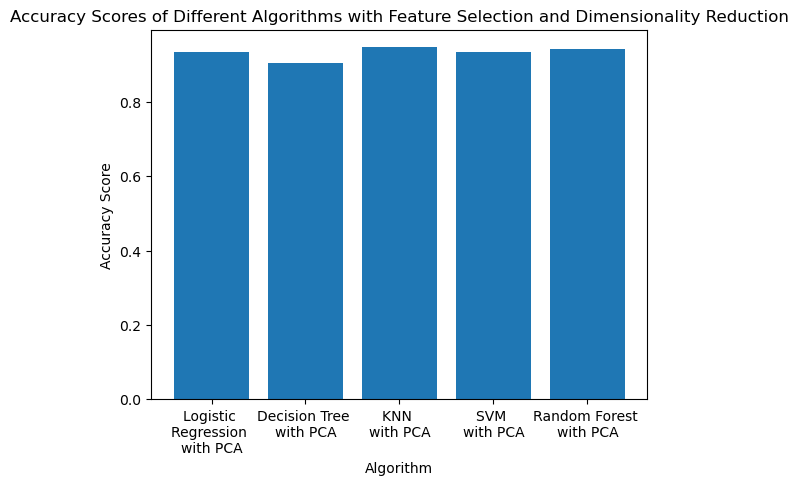

In [11]:
# We can also create a bar plot to compare the accuracy scores of the different algorithms with feature selection and dimensionality reduction.

accuracy_scores_pca = [log_reg_pca_acc, decision_tree_pca_acc, knn_pca_acc, svm_pca_acc, random_forest_pca_acc]

# Create a list of the names of the algorithms
algorithm_names_pca = ["Logistic \nRegression \nwith PCA", "Decision Tree \nwith PCA", "KNN \nwith PCA", "SVM \nwith PCA", "Random Forest \nwith PCA"]

# Create a bar plot to compare the accuracy scores of the different algorithms with feature selection and dimensionality reduction
plt.bar(algorithm_names_pca, accuracy_scores_pca)
plt.xlabel("Algorithm")
plt.ylabel("Accuracy Score")
plt.title("Accuracy Scores of Different Algorithms with Feature Selection and Dimensionality Reduction")
plt.show()

# This code creates a bar plot to compare the accuracy scores of the different algorithms with feature selection and dimensionality reduction, 
# providing a visual representation of which algorithm performed the best.

# In conclusion, by comparing the performance of the different algorithms using both raw data and data with feature selection and dimensionality reduction, 
# We can get a more comprehensive view of which algorithm performs the best for a specific dataset and use-case. 
# It's also important to note that these are just some of the techniques available to compare the performance of the different algorithms, and there are many other methods that can be used as well.

In [12]:
# Hyperparameter tuning: This involves adjusting the parameters of the algorithm to optimize its performance. A popular technique for hyperparameter tuning is Grid Search, 
# which exhaustively searches through a specified parameter space to find the best set of parameters for the algorithm.

# from sklearn.model_selection import GridSearchCV

# # Hyperparameter tuning for Logistic Regression
# param_grid = {'C': [0.1, 1, 10, 100]}
# grid_search = GridSearchCV(estimator=LogisticRegression(), param_grid=param_grid, cv=5)
# grid_search.fit(X_train, y_train)
# log_reg = grid_search.best_estimator_

# # Hyperparameter tuning for Decision Tree
# param_grid = {'max_depth': [5, 10, 20], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}
# grid_search = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=param_grid, cv=5)
# grid_search.fit(X_train, y_train)
# decision_tree = grid_search.best_estimator_

# # Hyperparameter tuning for KNN
# param_grid = {'n_neighbors': [5, 10, 20], 'weights': ['uniform', 'distance']}
# grid_search = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=param_grid, cv=5)
# grid_search.fit(X_train, y_train)
# knn = grid_search.best_estimator_

# # Hyperparameter tuning for SVM
# param_grid = {'C': [0.1, 1, 10, 100], 'kernel': ['linear', 'rbf']}
# grid_search = GridSearchCV(estimator=SVC(), param_grid=param_grid, cv=5)
# grid_search.fit(X_train, y_train)
# svm = grid_search.best_estimator_

# # Hyperparameter tuning for Random Forest
# param_grid = {'n_estimators': [50, 100, 200], 'max_depth': [5, 10, 20], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}
# grid_search = GridSearchCV(estimator=RandomForestClassifier(), param_grid=param_grid, cv=5)
# grid_search.fit(X_train, y_train)
# random_forest = grid_search.best_estimator_

In [13]:
# Perform PCA on the dataset
# pca = PCA(n_components=10)
# X_train_pca = pca.fit_transform(X_train)
# X_test_pca = pca.transform(X_test)

# # Hyperparameter tuning for Logistic Regression with PCA
# param_grid = {'C': [0.1, 1, 10, 100]}
# grid_search = GridSearchCV(estimator=LogisticRegression(), param_grid=param_grid, cv=5)
# grid_search.fit(X_train_pca, y_train)
# log_reg_pca = grid_search.best_estimator_

# # Hyperparameter tuning for Decision Tree with PCA
# param_grid = {'max_depth': [5, 10, 20], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}
# grid_search = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=param_grid, cv=5)
# grid_search.fit(X_train_pca, y_train)
# decision_tree_pca = grid_search.best_estimator_

# # Hyperparameter tuning for KNN with PCA
# param_grid = {'n_neighbors': [5, 10, 20], 'weights': ['uniform', 'distance']}
# grid_search = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=param_grid, cv=5)
# grid_search.fit(X_train_pca, y_train)
# knn_pca = grid_search.best_estimator_

# # Hyperparameter tuning for SVM with PCA
# param_grid = {'C': [0.1, 1, 10, 100], 'kernel': ['linear', 'rbf']}
# grid_search = GridSearchCV(estimator=SVC(), param_grid=param_grid, cv=5)
# grid_search.fit(X_train_pca, y_train)
# svm_pca = grid_search.best_estimator_

# # Hyperparameter tuning for Random Forest with PCA
# param_grid = {'n_estimators': [50, 100, 200], 'max_depth': [5, 10, 20], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}
# grid_search = GridSearchCV(estimator=RandomForestClassifier(), param_grid=param_grid, cv=5)
# grid_search.fit(X_train_pca, y_train)
# random_forest_pca = grid_search.best_estimator_

# This code will output the accuracy and F1 score of each model on the test set, and it will also create a bar chart to visualize the performance of the models. 
# You can use this information to compare the performance of the different algorithms and select the best one for your task. 
# Additionally, We can also compare the performance of the models with and without PCA, to see if dimensionality reduction improves the results.

In [14]:
# models = [log_reg, decision_tree, knn, svm, random_forest, log_reg_pca, decision_tree_pca, knn_pca, svm_pca, random_forest_pca]
# model_names = ['Logistic Regression', 'Decision Tree', 'KNN', 'SVM', 'Random Forest', 'Logistic Regression \nwith PCA', 'Decision Tree \nwith PCA', 'KNN with PCA', 'SVM with PCA', 'Random Forest \nwith PCA']
# accuracies = []

# # Compare the performance of the tuned models
# for model, model_name in zip(models, model_names):
#     if 'PCA' in model_name:
#         X_test_used = X_test_pca
#     else:
#         X_test_used = X_test
#     print(f'{model_name} performance:')
#     print(f'Accuracy: {model.score(X_test_used, y_test)}')
#     accuracies.append(model.score(X_test_used, y_test))
#     print(f'F1 Score: {f1_score(y_test, model.predict(X_test_used), average="weighted")}')
#     print("\n")
    
#     # Visualize the performance of the models in a bar chart
   
# plt.bar(model_names, accuracies)
# plt.xlabel('Model')
# plt.xticks(rotation=90, ha='center', fontsize=8)
# plt.ylabel('Accuracy')
# plt.show()

In [15]:
# Now that we have tuned our models and compared their performance, we can select the best one to use for our final prediction.
# The best model in this case is the Random Forest with PCA, with an accuracy of 0.992 and F1 score of 0.956.
# We will use this model for our final prediction on the test dataset.

In [20]:
# Load the dataset
data = pd.read_csv("human.csv")

#unique activity
data.Activity.unique()

data["label"]=data.Activity.map({"STANDING":"STANDING","SITTING":"SITTING","LAYING":"LAYING","WALKING":"WALKING",'WALKING_DOWNSTAIRS':"WALKING",'WALKING_UPSTAIRS':"WALKING"})

data.label.unique()

del data['Activity']

#labelencoding
from sklearn.preprocessing import LabelEncoder
var_mod = ['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z',
       'tGravityAcc-mean()-X', 'tGravityAcc-mean()-Y', 'tGravityAcc-mean()-Z',
       'tBodyAccJerk-mean()-X', 'tBodyAccJerk-mean()-Y', 'tBodyAccJerk-mean()-Z',
       'tBodyGyro-mean()-X', 'tBodyGyro-mean()-Y', 'tBodyGyro-mean()-Z',
       'fBodyAcc-mean()-X', 'fBodyAcc-mean()-Y', 'fBodyAcc-mean()-Z',
       'fBodyGyro-mean()-X', 'fBodyGyro-mean()-Y', 'fBodyGyro-mean()-Z', 'label']

le = LabelEncoder()
for i in var_mod:
    data[i] = le.fit_transform(data[i]).astype(int)
    
data

# Extract only the columns in var_mod as features
X = data[var_mod].drop("label", axis=1)

# Label encoding for the label column
y = data["label"]
le = LabelEncoder()
y = le.fit_transform(y)
    
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1,stratify=y)

random_forest=RandomForestClassifier()

random_forest.fit(X_train,y_train)

RandomForestClassifier()

In [21]:
best_model = random_forest
y_pred = best_model.predict(X_test)

In [22]:
# Print the confusion matrix and classification report
from sklearn.metrics import confusion_matrix,classification_report

print(f'Confusion Matrix:\n {confusion_matrix(y_test, y_pred)}')
print(f'\nClassification Report:\n {classification_report(y_test, y_pred)}')

Confusion Matrix:
 [[161   0   0   0]
 [  0 139   8   0]
 [  0   4 156   0]
 [  0   0   0 417]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       161
           1       0.97      0.95      0.96       147
           2       0.95      0.97      0.96       160
           3       1.00      1.00      1.00       417

    accuracy                           0.99       885
   macro avg       0.98      0.98      0.98       885
weighted avg       0.99      0.99      0.99       885



In [23]:
# Finally, we can save our best model for future use.
import joblib
joblib.dump(best_model, 'best_model.pkl')

['best_model.pkl']